In [68]:
import os
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table, join
import astropy.units as u

import scipy.stats as stats

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 24,
    'axes.labelsize': 'large',
    'mathtext.fontset': 'stix'
})

def errJy_to_errABmag(flux_Jy, fluxerr_Jy):
    return -2.5 / (flux_Jy * np.log(10)) * fluxerr_Jy

## GAMA catalog details

In [ ]:
#download GAMA from the database
with fits.open('http://www.gama-survey.org/dr4/data/cat/gkvInputCat/v02/gkvInputCatv02.fits') as cat:
    gkvInputCat = Table(cat[1].data)

with fits.open('http://www.gama-survey.org/dr4/data/cat/StellarMasses/v24/StellarMassesGKVv24.fits') as cat:
    StellarMassesGKV = Table(cat[1].data)

GAMA_mstar_concat = join(gkvInputCat, StellarMassesGKV)

In [6]:
#OR, if the joined catalog exists, import GAMA:
with fits.open('/data2/lsajkov/mpdg/data/GAMA/GAMA_mstars_concat.fits') as hdu:
    GAMA_mstar_concat = Table(hdu[1].data)

Redshifts

In [118]:
#redshift distribution
redshifts = GAMA_mstar_concat[~np.isnan(GAMA_mstar_concat['Z']) &\
                                       (GAMA_mstar_concat['Z'] >= 0)]['Z']

print('= GAMA redshifts =')
print('counting non-nan ')
print('and >= 0 only')
print(f'total:\t{len(redshifts)}')
print(f'min:\t{np.min(redshifts):.3f}')
print(f'max:\t{np.max(redshifts):.3f}')
print(f'mean:\t{np.mean(redshifts):.3f}')
print(f'median:\t{np.median(redshifts):.3f}')
print(f'std:\t{np.std(redshifts):.3f}')
print('==================')

= GAMA redshifts =
counting non-nan 
and >= 0 only
total:	364119
min:	0.000
max:	7.023
mean:	0.264
median:	0.219
std:	0.291


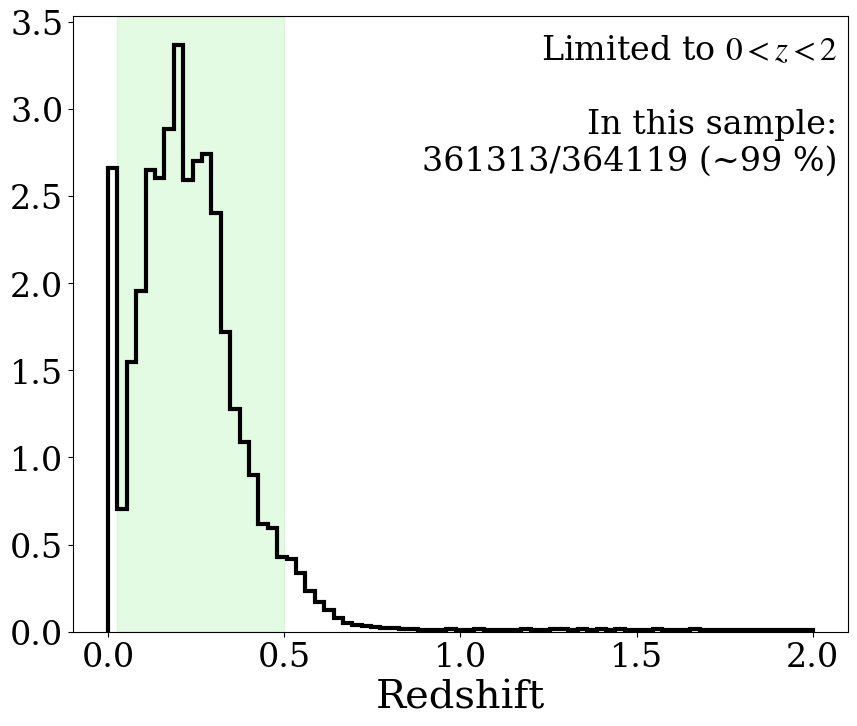

In [119]:
fig = plt.figure(figsize = (10, 8))
ax  = fig.add_subplot()

GAMA_redshift_subset = redshifts[(redshifts >= 0.) &\
                       (redshifts < 2)]

ax.hist(GAMA_redshift_subset,
        bins = 75, histtype = 'step',
        linewidth = 3, color = 'black', density = True)

ax.set_xlabel('Redshift')
ax.text(0.45, 0.75,
        f'Limited to $0 < z < 2$\n\nIn this sample:\n{len(GAMA_redshift_subset)}/{len(GAMA_redshifts)} (~{int(100 * len(GAMA_redshift_subset)/len(GAMA_redshifts))} %)',
        transform = ax.transAxes,
        ma = 'right')

ax.axvspan(0.025, 0.5, color = 'lightgreen', alpha = 0.25)

Magnitude distribution

In [144]:
g_snr = GAMA_mstar_concat['flux_gt']/GAMA_mstar_concat['flux_err_gt']
g_mag = GAMA_mstar_concat['flux_gt'] * u.Jy
g_mag = g_mag.to(u.ABmag).value

r_snr = GAMA_mstar_concat['flux_rt']/GAMA_mstar_concat['flux_err_rt']
r_mag = GAMA_mstar_concat['flux_rt'] * u.Jy
r_mag = r_mag.to(u.ABmag).value

/data2/lsajkov/mpdg/conda/envs/mpdg/lib/python3.12/site-packages/astropy/units/function/logarithmic.py:67: RuntimeWarning: invalid value encountered in log10
  return dex.to(self._function_unit, np.log10(x))
/var/tmp/lsajkov/ipykernel_1193969/3428203710.py:3: RuntimeWarning: divide by zero encountered in divide
  g_snr = GAMA_mstar_concat['flux_gt']/GAMA_mstar_concat['flux_err_gt']


Text(0.5, 0, 'Magnitude ($r$ or $g$)')

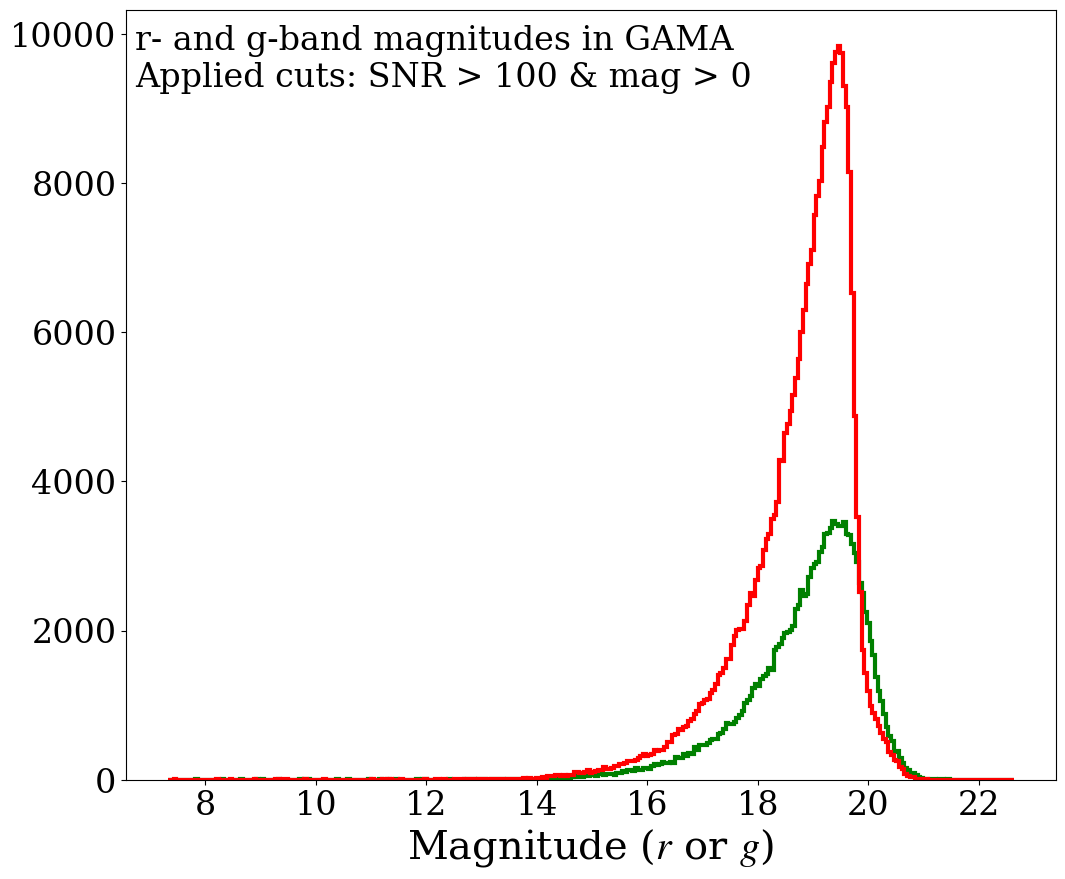

In [168]:
fig = plt.figure(figsize = (12, 10))
ax  = fig.add_subplot()

snr_thresh = 100

bins = ax.hist(g_mag[(g_mag > 0) & (g_snr > snr_thresh)],
        bins = 'auto',
        histtype = 'step', color = 'green',
        linewidth = 3)
ax.hist(r_mag[(r_mag > 0) & (r_snr > snr_thresh)],
        bins = bins[1], 
        histtype = 'step', color = 'red',
        linewidth = 3)

ax.text(0.01, 0.9,
        f'r- and g-band magnitudes in GAMA\nApplied cuts: SNR > {snr_thresh} & mag > 0',
        transform = ax.transAxes)

ax.set_xlabel('Magnitude ($r$ or $g$)')